In [1]:
from cccn.noise import CrossCorrelation
from cccn.post_func import PostProcForNoise

In [2]:
cc = CrossCorrelation()
cc.clean()
for path in ['dataSAC/2008.010', 'dataSAC/2008.011']:
    cc.para.datapath=path
    cc.para.suffix = 'sac'
    cc.para.target_dt = 1
    cc.para.nnode = 1
    cc.read_sac()
    cc.perwhiten()
    cc.docc()

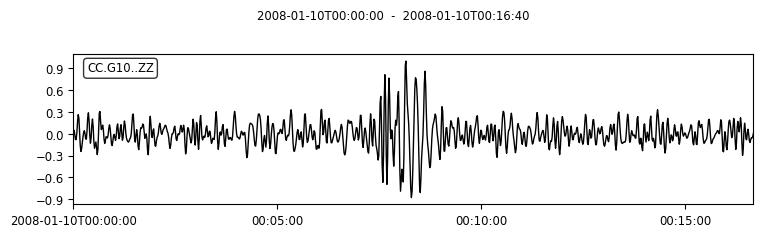

         network: CC
         station: G10
        location: 
         channel: ZZ
       starttime: 2008-01-10T00:00:00.000000Z
         endtime: 2008-01-10T00:16:40.000000Z
   sampling_rate: 1.0
           delta: 1.0
            npts: 1001
           calib: 1.0
         _format: ASDF
      processing: ['ObsPy 1.3.1: normalize(norm=None)']
             sac: AttribDict({'delta': 1.0, 'b': 0.0, 'e': 0.0, 'internal0': 2.0, 'nzyear': 1970, 'nzjday': 1, 'nzhour': 0, 'nzmin': 0, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'npts': 0, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'knetwk': 'CC', 'kstnm': 'G10', 'stla': 0.0, 'stlo': 0.0, 'kevnm': 'CC.G01', 'evla': 0.0, 'evlo': 0.0})
           stack: AttribDict({'group': 'all', 'count': 2, 'type': 'linear'})

In [3]:
postfunc = PostProcForNoise('COR_CC.G01_CC.G10_ZZ.h5')
st = postfunc.stack_all()
st.plot()
st[0].write('CC.G01_CC.G10.sac')